In [1]:
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


## Godunov's Method

This method is obtained by solving the Riemann problem between states $Q_{i-1}^{n}$ and $Q_{i}^{n}$ in order to determine the flux $F_{i-\frac{1}{2}}^{n}$ as 
\begin{equation}
    F_{i-\frac{1}{2}}^{n} = f(Q_{i-\frac{1}{2}}^{n})
\end{equation}
where f is the numerical flux. Likewise $F_{i+\frac{1}{2}}^{n}$ is obatined in the sameway but between states $Q_{i}^{n}$ and $Q_{i+1}^{n}$ as 
\begin{equation}
    F_{i+\frac{1}{2}}^{n} = f(Q_{i+\frac{1}{2}}^{n})
\end{equation}

In [2]:
hl = 2
hr = 1
ul = 0
ur = 0

g = 1
#intial data
ql = array([hl,hl*ul])
qr = array([hr,hr*ur])


In [3]:
from exact_rp import *

#rarefaction solution
hmr,umr = rare(ql,qr,g)

#shock solution
hms,ums = newton(ql,qr,g)

#intermediate states
qmr = array([hmr,hmr*umr])
qms = array([hms,hms*ums])

In [4]:
#problem
hl = hms
hr = 1
ul = ums
ur = 0

'''hl = 1
hr = 1
ul = -0.5
ur = 0.5
'''
# Spatial domain
ax = -5
bx = 5
ay = -2
by = 4
meqn = 2  # Number of equations in the system

# Gravity
g = 1

# Temporal domain
to = 0
Tfinal = 2

#intial data
ql = array([hl,hl*ul])
qr = array([hr,hr*ur])

cfl = 0.45


## Initial conditions

The solver should supply an initialization routine to initialize  q(x,t)  at time  t=0 .


In [5]:
def h_init(x,hl,hr):    
    q0 = where(x < 0,hl,hr)
    return q0

def hu_init(x,hl,ul,hr,ur):    
    #q0 = zeros(x.shape)  
    q0 = where(x<0,hl*ul,hr*ur)
    return q0

def qinit(x,meqn):
    
    q = zeros((x.shape[0],meqn))
    q[:,0] = h_init(x,hl,hr)
    q[:,1] = hu_init(x,hl,ul,hr,ur)
    
    return q


## Sample test and plot

In [6]:

import godunuv

# mq = 0 : Height field
# mq = 1 : Momentum field

mq = 0

mx = 200

# Estimate maximum wave speed.  Note that this will change with time, so we have to find a 
# maximum that works for t in [0,T]
umax = 1.5
    
# Estimate time step and number of time steps to take
dx = (bx-ax)/mx
dt_est = cfl*dx/umax;
nout = int(floor(Tfinal/dt_est) + 1)
dt = Tfinal/nout

Q,x,t = godunuv.Godunov(ax,bx,mx,meqn,Tfinal,nout,g,\
            newton=newton,\
            qinit=qinit)


<IPython.core.display.Javascript object>


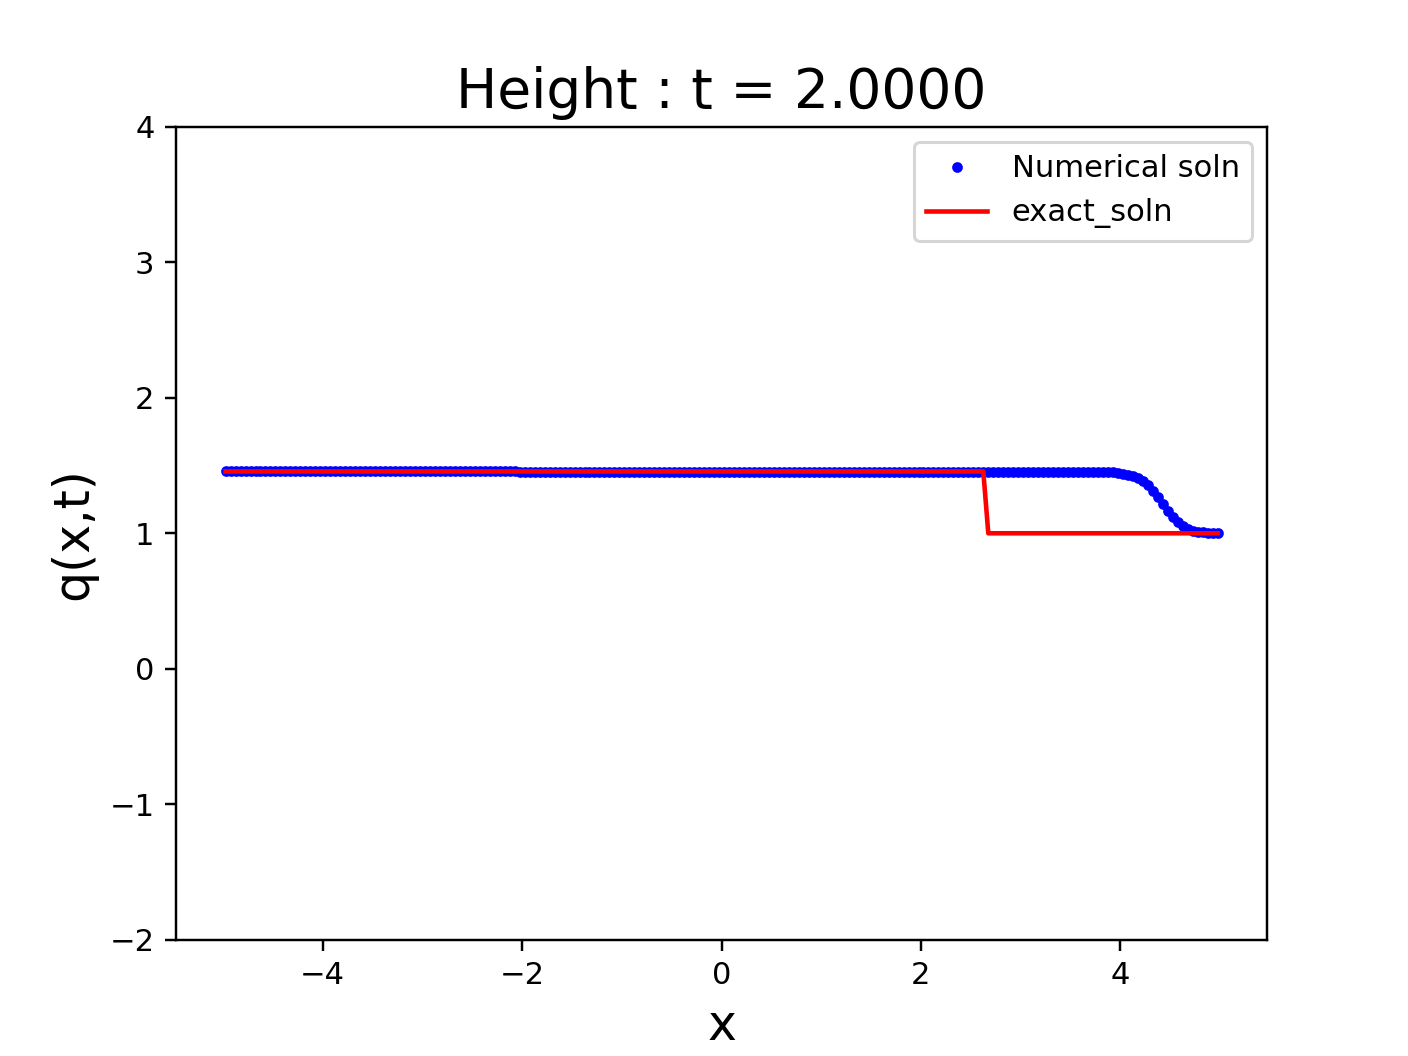

In [7]:
fig = figure(1)
clf()

qo = Q[:,mq,0]
hdl, = plot(x,qo,'b.',markersize=5,label='Numerical soln')

if mq == 0:
    tstr = 'Height : t = {:.4f}'
else:
    tstr = 'Momentum : t = {:.4f}'

htitle = title(tstr.format(0),fontsize=18)

q0 = qexact(x,to,mq,ql,qr,g)

hde, = plot(x,q0,'r-',markersize=5,label='exact_soln')


#Time loop
time = 0
for n in range(nout):
    
    qe = qexact(x,t[n],mq,ql,qr,g)
    hde.set_ydata(qe)
    
    q = Q[:,mq,n]
    hdl.set_ydata(q)
    #hdl.set_ydata(q)
    
    xlabel('x',fontsize=16)
    ylabel('q(x,t)',fontsize=16)
    htitle.set_text(tstr.format(t[n]))
    
    ylim([ay,by])
    legend()
    pause(0.1)

    fig.canvas.draw()        

    